# 1. Data import and Understanding

In [2]:
!pip install tensorflow

     -------------------------------------- 376.9/376.9 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 3.5 MB/s eta 0:00:00
     -------------------------------------- 127.8/127.8 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 5.4 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 3.9/3.9 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ------------------------------------- 243.8/243.8 kB 14.6 MB/s eta 0:00:00
     ------------------------------------- 240.7/240.7 kB

In [4]:
# Importing required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as py
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from tensorflow import keras
import tensorflow as tf

In [6]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.16.1
Keras version: 3.3.3


In [8]:
# Reading the ‘Signals.csv’ as DataFrame
df=pd.read_csv('C:/Users/FARHAN/Downloads/Signal.csv')
df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [29]:
# checking dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
# Check for missing values
missing_values = df.isnull().sum()

In [19]:
print(missing_values)

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64


In [20]:
#total no of rows
df.shape[0]
    

1599

In [18]:

# Calculating percentage of missing values for each attribute
total_rows = df.shape[0]
missing_percentage = (missing_values / total_rows) * 100

# Printing the percentage of missing values for each attribute
print("Percentage of missing values for each attribute:")
print(missing_percentage)

Percentage of missing values for each attribute:
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [30]:
# Check for duplicate records
df.duplicated().value_counts()


False    1359
True      240
dtype: int64

In [35]:
# checking duplicate rows in dataframe
duplicate_records = df[df.duplicated()]
duplicate_records

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11.0         34.0      0.99780         3.51          0.56   
11           17.0        102.0      0.99780         3.35          0.80   
27           10.0         37.0      0.99660         3.17          0.91   
40           12.0         87.0      0.99780         3.33          0.83   
65            4.0         11.0      0.99620         3.41          0.39   
...           ...          ...          ...          ...           ...   
1563         12.0         20.0      0.99546         3.29          0.54   
1564         12.0         20.0      0.99546         3.29          0.54   
1567         12.0         20.0      0.99546         3.29          0.54   
1581         24.0         32.0      0.99402         3.54          0.60   
1596         29.0         40.0      0.99574         3.42          0.75   

      Parameter 11  Signal_Strength  
4              9.4                5  
11            10.5                5  
27             9.5                5  
40            10.5                5  
65            10.9                5  
...            ...              ...  
1563          10.1                5  
1564          10.1                5  
1567          10.1                5  
1581          11.3                5  
1596          11.0                6  

[240 rows x 12 columns]

In [36]:
# Handling duplicate records 
df.drop_duplicates(inplace=True)
df

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0             7.4        0.700         0.00          1.9        0.076   
1             7.8        0.880         0.00          2.6        0.098   
2             7.8        0.760         0.04          2.3        0.092   
3            11.2        0.280         0.56          1.9        0.075   
5             7.4        0.660         0.00          1.8        0.075   
...           ...          ...          ...          ...          ...   
1593          6.8        0.620         0.08          1.9        0.068   
1594          6.2        0.600         0.08          2.0        0.090   
1595          5.9        0.550         0.10          2.2        0.062   
1597          5.9        0.645         0.12          2.0        0.075   
1598          6.0        0.310         0.47          3.6        0.067   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0            11.0         34.0      0.99780         3.51          0.56   
1            25.0         67.0      0.99680         3.20          0.68   
2            15.0         54.0      0.99700         3.26          0.65   
3            17.0         60.0      0.99800         3.16          0.58   
5            13.0         40.0      0.99780         3.51          0.56   
...           ...          ...          ...          ...           ...   
1593         28.0         38.0      0.99651         3.42          0.82   
1594         32.0         44.0      0.99490         3.45          0.58   
1595         39.0         51.0      0.99512         3.52          0.76   
1597         32.0         44.0      0.99547         3.57          0.71   
1598         18.0         42.0      0.99549         3.39          0.66   

      Parameter 11  Signal_Strength  
0              9.4                5  
1              9.8                5  
2              9.8                5  
3              9.8                6  
5              9.4                5  
...            ...              ...  
1593           9.5                6  
1594          10.5                5  
1595          11.2                6  
1597          10.2                5  
1598          11.0                6  

[1359 rows x 12 columns]

In [45]:
#again, check for duplicates
df.duplicated().sum()

0

In [52]:
#checking for unique values in the columns
df.nunique()

Parameter 1         96
Parameter 2        143
Parameter 3         80
Parameter 4         91
Parameter 5        153
Parameter 6         60
Parameter 7        144
Parameter 8        436
Parameter 9         89
Parameter 10        96
Parameter 11        65
Signal_Strength      6
dtype: int64

In [47]:
# Imputing missing values with appropriate method 
# Replace numerical missing values with mean
df.fillna(df.mean(), inplace=True)
# Replacing categorical missing values with mode
df.fillna(df.mode().iloc[0], inplace=True)
# Printing information after handling duplicates and missing values
print("Duplicate Records:")
print(duplicate_records)
print("\nDataset after handling duplicates and missing values:")
print(df.head())

Duplicate Records:
      Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11.0         34.0

In [62]:
# Checking statistical summary
df.describe().T

count       mean        std      min      25%      50%  \
Parameter 1      1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
Parameter 2      1359.0   0.529478   0.183031  0.12000   0.3900   0.5200   
Parameter 3      1359.0   0.272333   0.195537  0.00000   0.0900   0.2600   
Parameter 4      1359.0   2.523400   1.352314  0.90000   1.9000   2.2000   
Parameter 5      1359.0   0.088124   0.049377  0.01200   0.0700   0.0790   
Parameter 6      1359.0  15.893304  10.447270  1.00000   7.0000  14.0000   
Parameter 7      1359.0  46.825975  33.408946  6.00000  22.0000  38.0000   
Parameter 8      1359.0   0.996709   0.001869  0.99007   0.9956   0.9967   
Parameter 9      1359.0   3.309787   0.155036  2.74000   3.2100   3.3100   
Parameter 10     1359.0   0.658705   0.170667  0.33000   0.5500   0.6200   
Parameter 11     1359.0  10.432315   1.082065  8.40000   9.5000  10.2000   
Signal_Strength  1359.0   5.623252   0.823578  3.00000   5.0000   6.0000   

                      75%        max  
Parameter 1       9.20000   15.90000  
Parameter 2       0.64000    1.58000  
Parameter 3       0.43000    1.00000  
Parameter 4       2.60000   15.50000  
Parameter 5       0.09100    0.61100  
Parameter 6      21.00000   72.00000  
Parameter 7      63.00000  289.00000  
Parameter 8       0.99782    1.00369  
Parameter 9       3.40000    4.01000  
Parameter 10      0.73000    2.00000  
Parameter 11     11.10000   14.90000  
Signal_Strength   6.00000    8.00000

<Axes: >

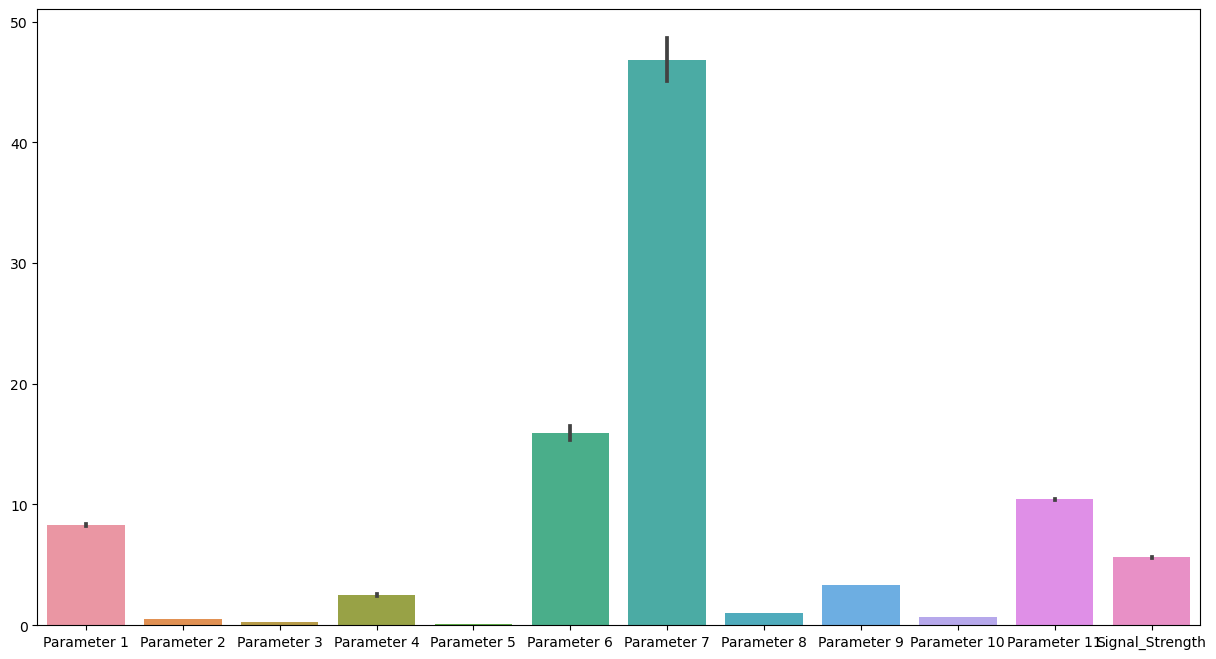

In [61]:
#visualizing the dstribution
py.figure(figsize=[15,8])
sns.barplot(df)

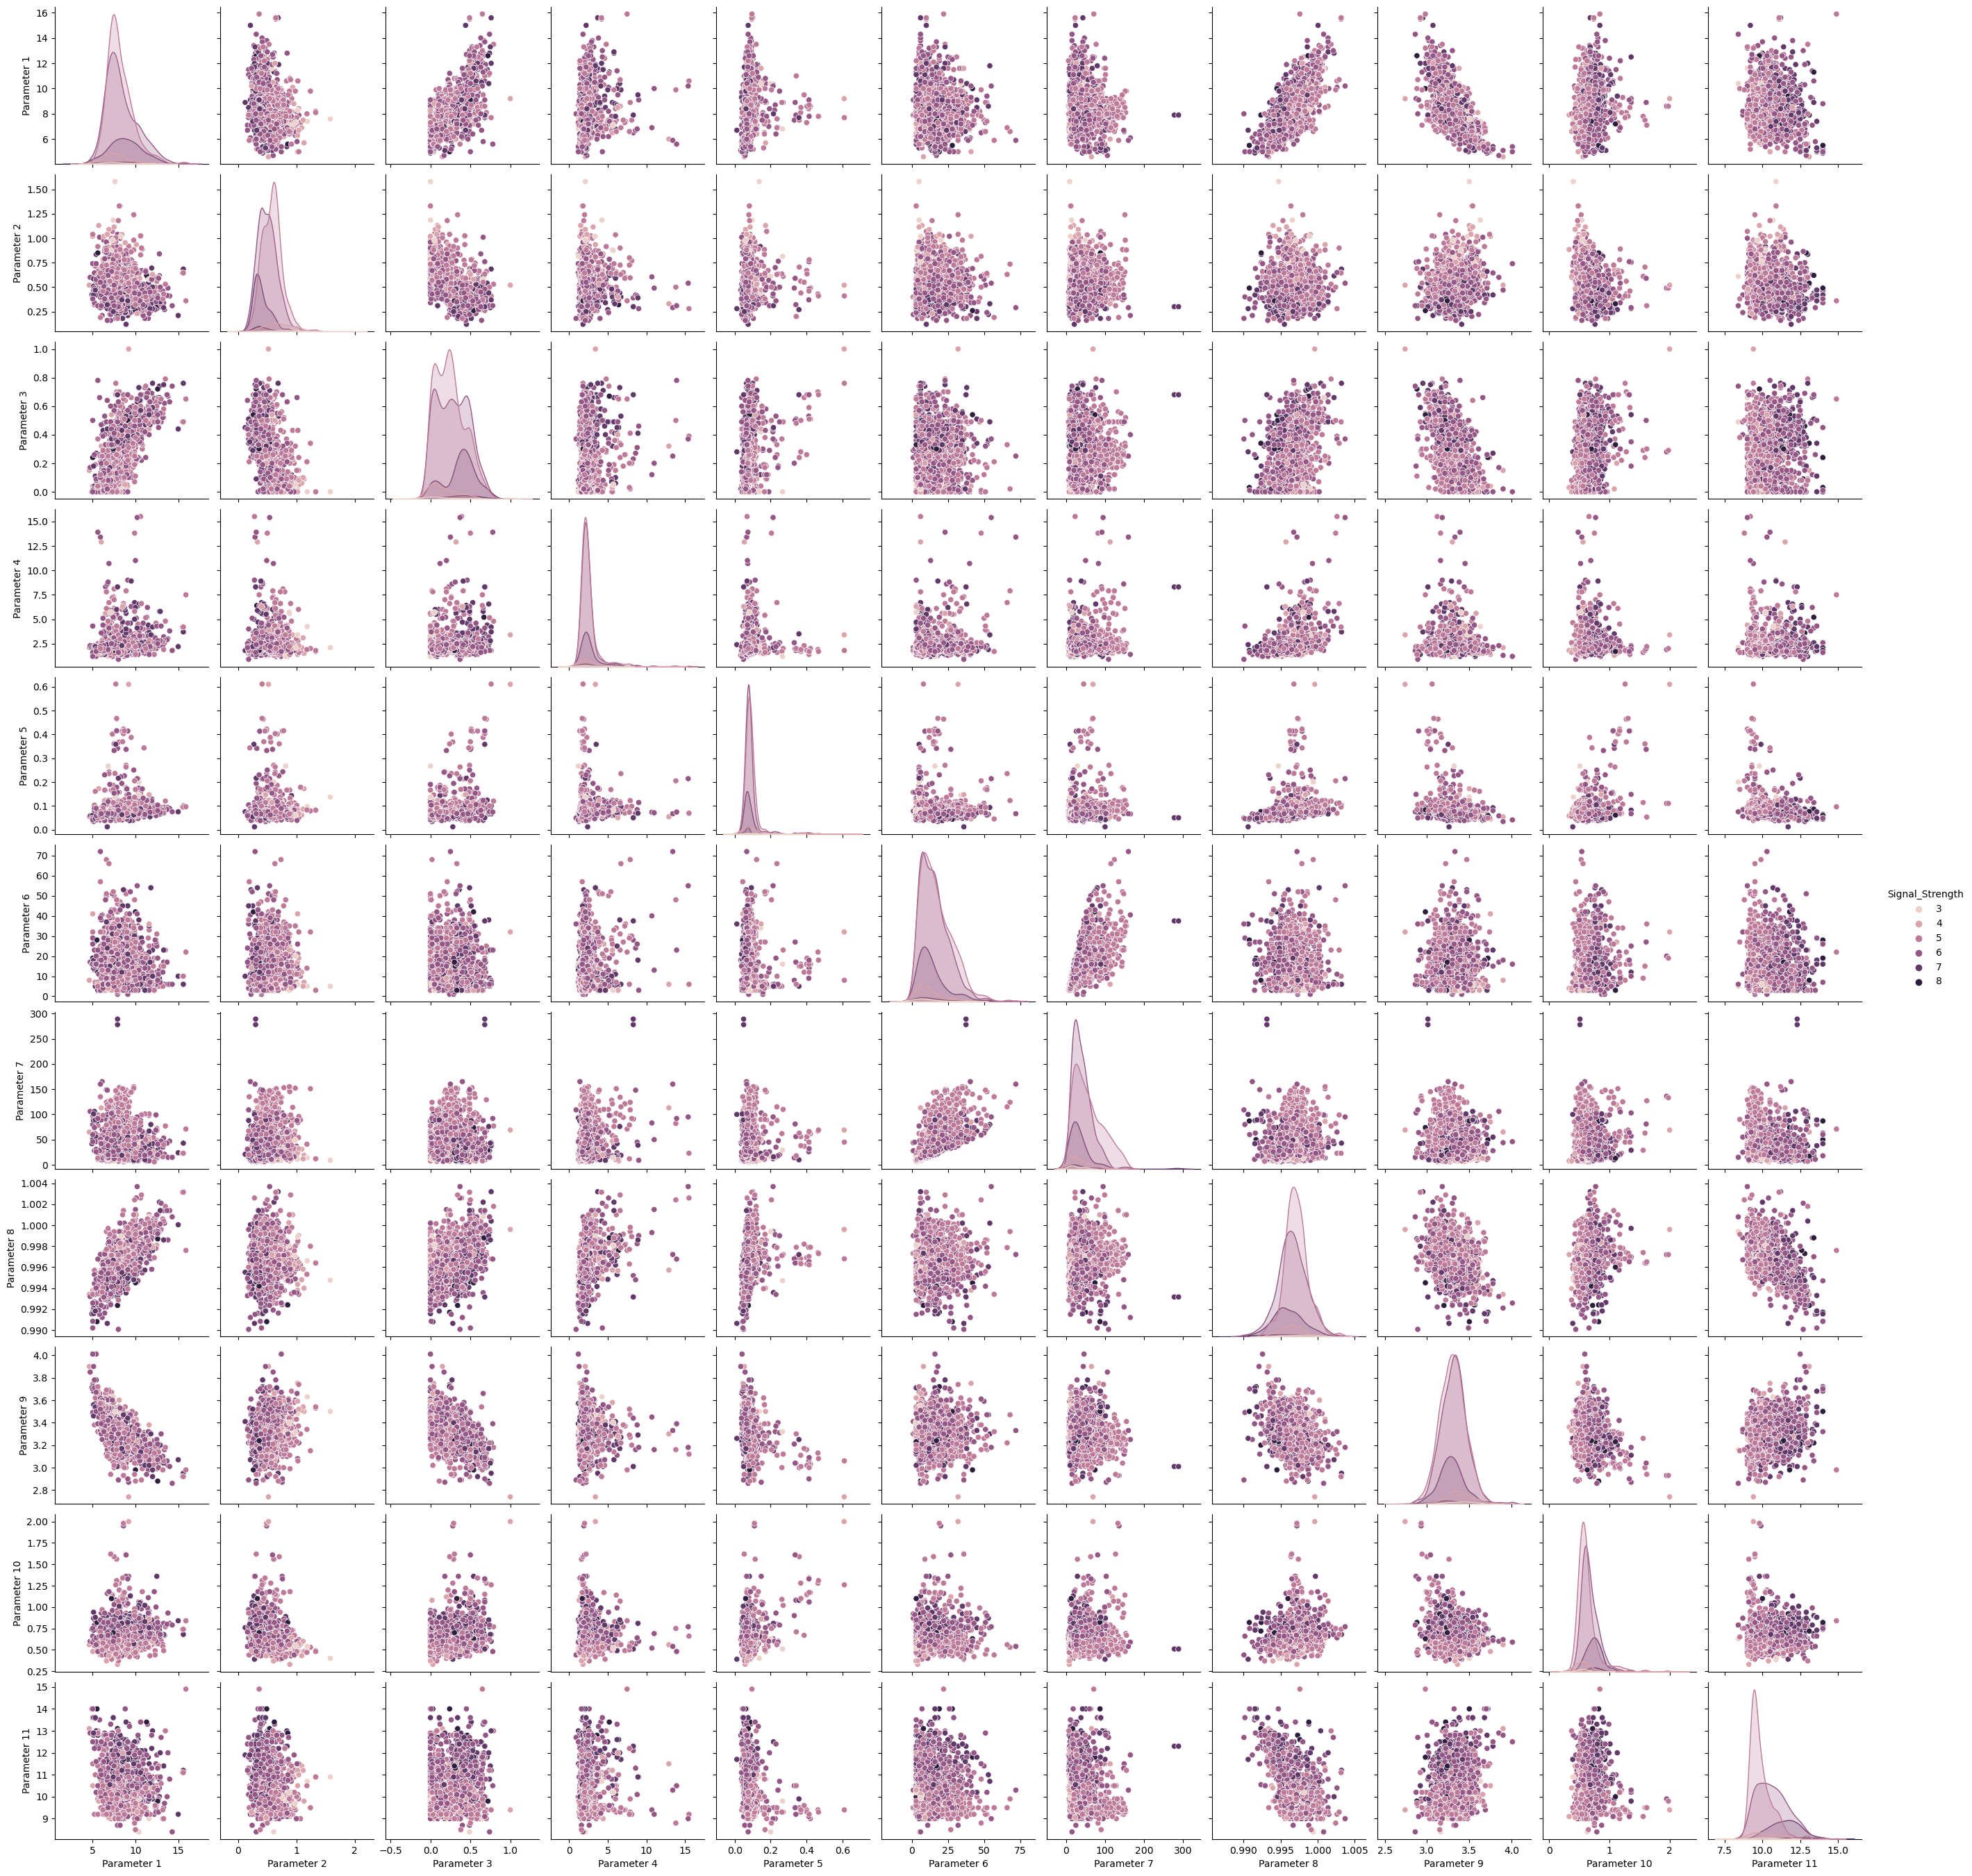

In [63]:
#plotting pairplot
sns.pairplot(data=df,hue='Signal_Strength' , diag_kind = 'kde')

<Axes: >

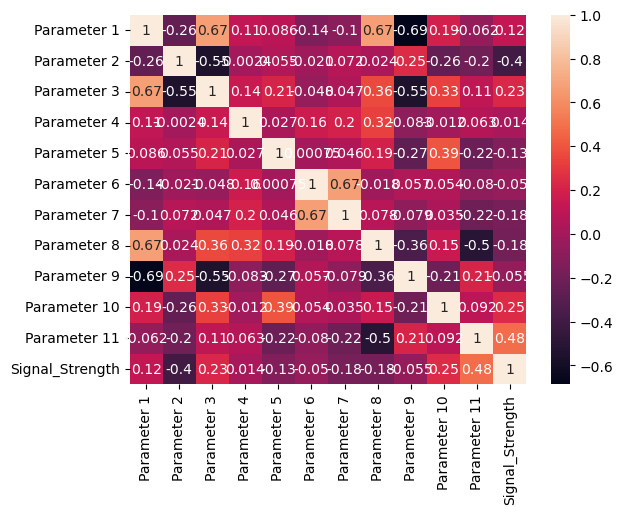

In [89]:
a=df.corr()
sns.heatmap(a,annot=True)

In [ ]:
# Insights from the distribution
Parameter 6 and 7 have more number of diverse values. Parameter 7 has highest max value while parameter 6 has second max value.
Highest value of signal strength is 8.
Total count of all the parameters is 1359.
The Lowest mean value is found in parameter 5 and Highest mean value is in parameter 7.
The min value is found in parameter 3.
Parameter 11 is strongly correlated to Signal_Strength.

# 2. Data preprocessing

In [91]:
df_copy1=df.copy()


In [94]:
# Split the data into X & Y
x = df_copy1.drop('Signal_Strength',axis=1)
y = df_copy1['Signal_Strength'] 




In [95]:
x.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
5          7.4         0.66         0.00          1.8        0.075   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
5         13.0         40.0       0.9978         3.51          0.56   

   Parameter 11  
0           9.4  
1           9.8  
2           9.8  
3           9.8  
5           9.4

In [96]:
y.head()

0    5
1    5
2    5
3    6
5    5
Name: Signal_Strength, dtype: int64

In [101]:
# Split the train data into train and val set
X_train,X_test,Y_train,Y_test= train_test_split(x,y, test_size=0.3,random_state=42)

In [102]:
# Print shape of all the 4 variables
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (951, 11)
Shape of X_test: (408, 11)
Shape of Y_train: (951,)
Shape of Y_test: (408,)


In [ ]:
# train and test data are in sync

In [186]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [187]:
## One hot encoding of the target columns
Y_train_cat=tf.keras.utils.to_categorical(Y_train)
Y_val_cat=tf.keras.utils.to_categorical(Y_test)

# 3. Model 1 Training & Evaluation using Neural Network 

In [188]:
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,Input, BatchNormalization, LeakyReLU, ReLU
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.initializers import HeUniform

In [408]:
# Model Building
model = Sequential()

model.add(Dense(11, input_shape=(11,), activation='relu'))

#add new layer
model.add(Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.15))
model.add(Dense(64, activation='relu'))
# output layer

model.add(Dense(9, activation='softmax'))


In [409]:
model.summary()

Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_182 (Dense)                    │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ (None, 256)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_185 (Dense)                    │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,237 (79.05 KB)

 Trainable params: 20,237 (79.05 KB)

 Non-trainable params: 0 (0.00 B)

In [410]:
# Compiling model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [411]:
# Fitting the model
train=model.fit(X_train, Y_train_cat, validation_data=(X_test,Y_val_cat), 
                  epochs=20,batch_size=32,
                  callbacks=callback)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3801 - loss: 0.5809 - val_accuracy: 0.4412 - val_loss: 0.2937
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4794 - loss: 0.2694 - val_accuracy: 0.5025 - val_loss: 0.2211
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5061 - loss: 0.2249 - val_accuracy: 0.5539 - val_loss: 0.2081
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5642 - loss: 0.2106 - val_accuracy: 0.5588 - val_loss: 0.1997
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5581 - loss: 0.2036 - val_accuracy: 0.5784 - val_loss: 0.1958
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5498 - loss: 0.1997 - val_accuracy: 0.5711 - val_loss: 0.1928
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5535 - loss: 0.1945 - val_accuracy: 0.5662 - val_loss: 0.1911
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5612 - loss: 0.1948 - val_accuracy: 0.6005 - val_loss

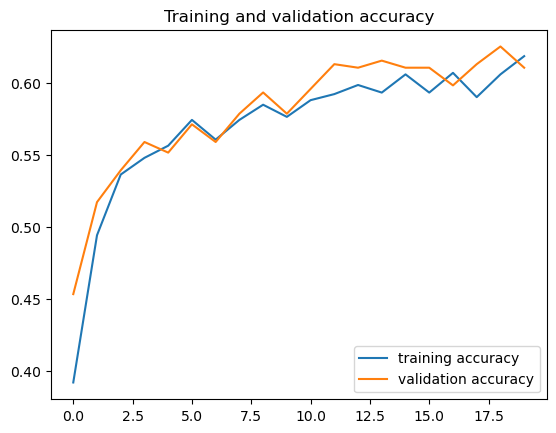

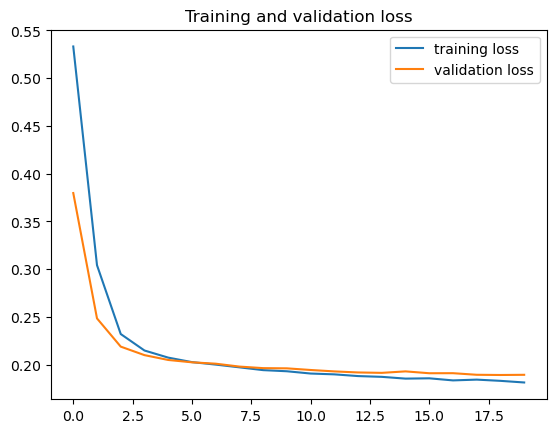

In [399]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

py.plot(epochs, accuracy, label = 'training accuracy' )
py.plot(epochs, val_accuracy, label = 'validation accuracy')
py.title('Training and validation accuracy')
py.legend(loc = 'lower right')
py.figure()

py.plot(epochs, loss, label = 'training loss' )
py.plot(epochs, val_loss, label = 'validation loss')
py.legend(loc = 'upper right')
py.title('Training and validation loss')
py.show()

# Model 2 Building with Batch Normalization and other hyperparameters

In [370]:
#Intialize the model
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Reshape((11,),input_shape=(11,)))

#add new layer
model2.add(Dense(64,activation='relu', kernel_initializer=HeUniform(seed=7)))
# BN for regularization to prevent overefitting
model2.add(BatchNormalization(momentum=0.6))

#add new layer
model2.add(Dense(32,activation='relu', kernel_initializer=HeUniform(seed=7)))
# BN for regularization to prevent overefitting
model2.add(BatchNormalization(momentum=0.6))


#Output layer
model2.add(tf.keras.layers.Dense(9, activation='softmax'))

In [371]:
model2.summary()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_33 (Reshape)                 │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_147 (Dense)                    │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,529 (13.79 KB)

 Trainable params: 3,337 (13.04 KB)

 Non-trainable params: 192 (768.00 B)

In [372]:

# compiling the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5,restore_best_weights=True)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [373]:
# Fitting the model
train2 = model2.fit(X_train, Y_train_cat, validation_data=(X_test,Y_val_cat), 
                    
                  epochs=20,batch_size=32,
                  callbacks=callback)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1428 - loss: 2.5619 - val_accuracy: 0.2672 - val_loss: 2.1656
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3551 - loss: 1.9604 - val_accuracy: 0.4338 - val_loss: 1.8880
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4653 - loss: 1.7495 - val_accuracy: 0.4902 - val_loss: 1.6923
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5171 - loss: 1.6440 - val_accuracy: 0.5294 - val_loss: 1.5432
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5371 - loss: 1.4674 - val_accuracy: 0.5735 - val_loss: 1.4283
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5649 - loss: 1.3871 - val_accuracy: 0.5539 - val_loss: 1.3579
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5930 - loss: 1.2613 - val_accuracy: 0.5441 - val_loss: 1.3174
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5800 - loss: 1.2000 - val_accuracy: 0.5417 - val_loss

Text(0.5, 1.0, 'Training and validation loss')

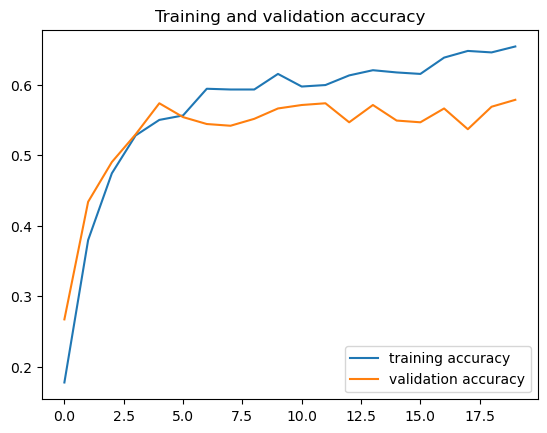

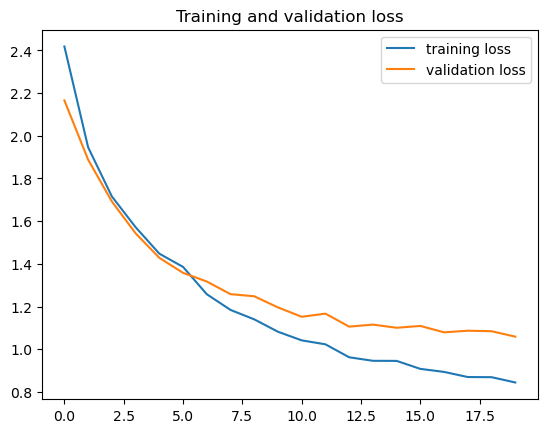

In [374]:
accuracy = train2.history['accuracy']
val_accuracy = train2.history['val_accuracy']
loss = train2.history['loss']
val_loss = train2.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

py.plot(epochs, accuracy, label = 'training accuracy' )
py.plot(epochs, val_accuracy, label = 'validation accuracy')
py.title('Training and validation accuracy')
py.legend(loc = 'lower right')
py.figure()

py.plot(epochs, loss, label = 'training loss' )
py.plot(epochs, val_loss, label = 'validation loss')
py.legend(loc = 'upper right')
py.title('Training and validation loss')

# Observations


# Insights:

Loss: Model 1 consistently achieves lower loss values compared to Model 2 throughout the epochs. This suggests that Model 1 is better at minimizing errors during training and generalizes better to the validation set.

Accuracy: Model 2 starts with very low accuracy but shows significant improvement, reaching comparable accuracy to Model 1 by the end of training. However, Model 1 consistently maintains higher accuracy throughout training.

# Conclusion:

Based on the insights from loss and accuracy metrics, Model 1 appears to be better overall, as it achieves lower loss values and higher accuracy consistently. It demonstrates better performance in terms of both minimizing errors and correctly classifying data.





